# Australian forecast skill

This notebook contains plots showing the skill of quantities averaged over the Natural Resource Management (NRM) super-cluster regions (see https://www.climatechangeinaustralia.gov.au/en/overview/methodology/nrm-regions/). As for the generic skill results, plots are shown for CAFE-f6 and for the CanESM5 and EC-Earth3 CMIP6 DCPP submissions. 30-year climatological and verification periods are used for both the CAFE-f6 and CMIP6 data. However, because the historical CMIP6 data end in 2014, these periods differ slightly: 1991-2020 for CAFE-f6; 1985-2014 for CanESM5 and EC-Earth3. Note also that the CanESM5 hindcasts are initialised at the end of December every year, while the CAFE-f6 and EC-Earth3 hindcasts are initialised at the beginning of November every year.

Significant points (as identified by a non-parametric block bootstrapping procedure) are shown by filled circles for the line plots.

If you wish to see anything added to these results, please contact Dougie.

In [1]:
import geopandas

import numpy as np

import xarray as xr

import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

/g/data/xv83/users/ds0092/software/miniconda3/envs/forecast_analysis/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
%load_ext autoreload
%autoreload 2
%load_ext lab_black

In [3]:
def _load_skill_metric(
    hindcast, reference, timescale, variable, metric, verif_period=None
):
    """Load a skill metric"""
    SKILL_DIR = "../data/skill/"
    if hindcast == "CAFEf6":
        anom_period = "1991-2020"
    else:
        anom_period = "1985-2014"
    if verif_period is None:
        verif_period = anom_period
    file = (
        f"{SKILL_DIR}/{hindcast}.{reference}.{timescale}.anom_{anom_period}"
        f".{variable}_Aus_NRM.{metric}_{verif_period}.zarr"
    )
    return xr.open_zarr(file).compute()

In [4]:
def plot_skill(
    hindcasts,
    reference,
    timescales,
    variable,
    metrics,
    verif_period=None,
    figsize=(9, 15),
):
    """
    Helper function for plotting some skill scores.
    """
    from itertools import cycle

    nrows = 5
    ncols = len(timescales)
    fig, axs = plt.subplots(
        nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=figsize
    )
    axs = np.reshape(axs, (nrows, ncols))

    colors = ["C0", "C1", "C2"]
    colorcycler = cycle(colors)
    plot_lines = []
    for idx, timescale in enumerate(timescales):
        for hindcast in hindcasts:
            color = next(colorcycler)
            lines = ["-", "--", "-.", ":"]
            linecycler = cycle(lines)
            metric_lines = []
            for metric in metrics:
                try:
                    skill = _load_skill_metric(
                        hindcast, reference, timescale, variable, metric, verif_period
                    )
                    line = next(linecycler)
                    for idy, region in enumerate(skill.region):
                        ax = axs[idy, idx]
                        to_plot = skill.sel(region=region)
                        (p,) = to_plot[variable].plot(
                            ax=ax,
                            linestyle=line,
                            color=color,
                        )
                        to_plot[variable].where(to_plot[f"{variable}_signif"]).plot(
                            ax=ax, linestyle="none", marker="o", color=color
                        )

                        ax.set_title(f"{to_plot['region'].values}, {timescale}")
                        if idx == 0:
                            if len(metrics) > 1:

                                ax.set_ylabel("Skill")
                            else:
                                ax.set_ylabel(metrics[0])
                        else:
                            ax.set_ylabel("")

                        if idy == 4:
                            ax.set_xlabel(f"Final lead month of {timescale} average")
                        else:
                            ax.set_xlabel("")

                        ax.grid(True)
                        ax.set_ylim(-1, 1)
                    metric_lines.append(p)
                except:
                    pass
            plot_lines.append(metric_lines)

    legend1 = axs[0, 0].legend([l[0] for l in plot_lines], hindcasts, loc=1)
    if len(metrics) > 1:
        axs[0, 0].legend(plot_lines[0], metrics, loc=4)
        axs[0, 0].add_artist(legend1)

    fig.tight_layout()

    return fig

## Focus regions
In the following we'll show some skill results for the following NRM super clusters and for the average over all of Australia

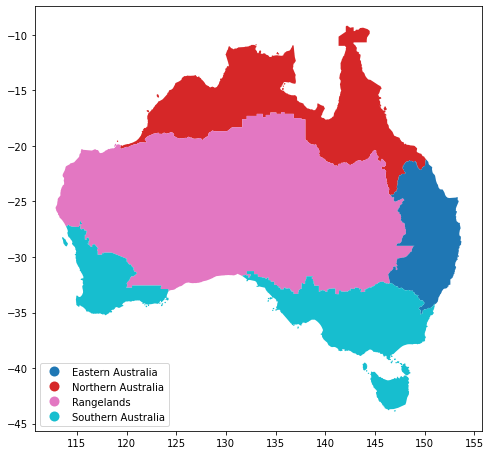

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
df = geopandas.read_file("../data/raw/NRM_super_clusters/NRM_super_clusters.shp")
_ = df.plot("label", ax=ax, legend=True, legend_kwds={"loc": "lower left"})

## Near-surface (2m) temperature relative to JRA55

### Anomaly correlation coefficient

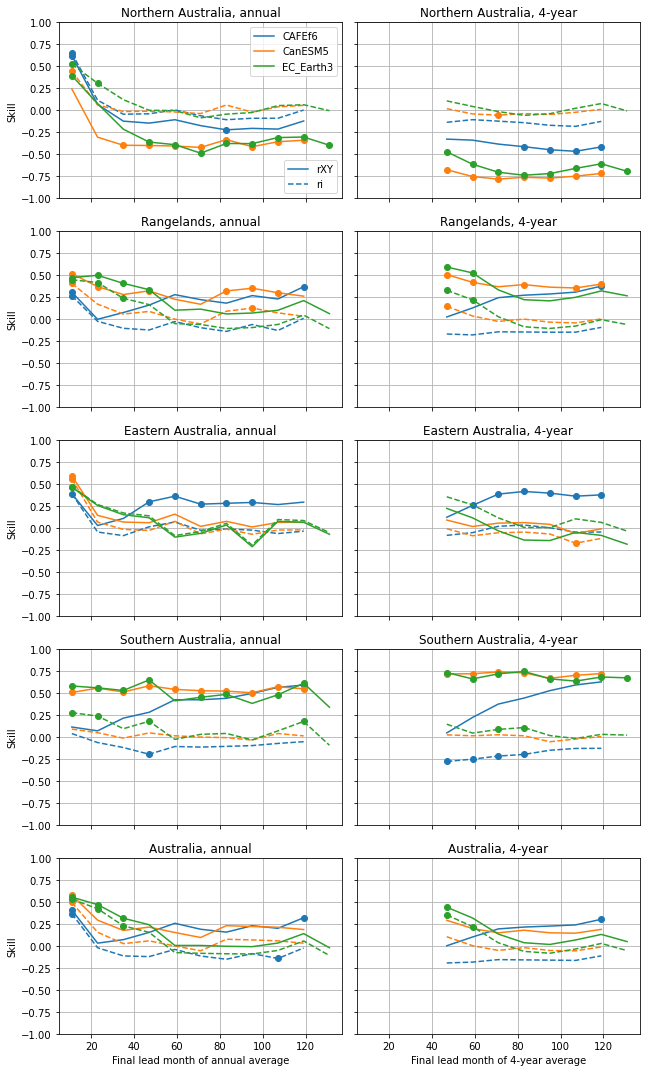

In [6]:
_ = plot_skill(
    ["CAFEf6", "CanESM5", "EC_Earth3"],
    "JRA55",
    ["annual", "4-year"],
    "t_ref",
    ["rXY", "ri"],
)

### Mean squared skill score relative to historical simulations

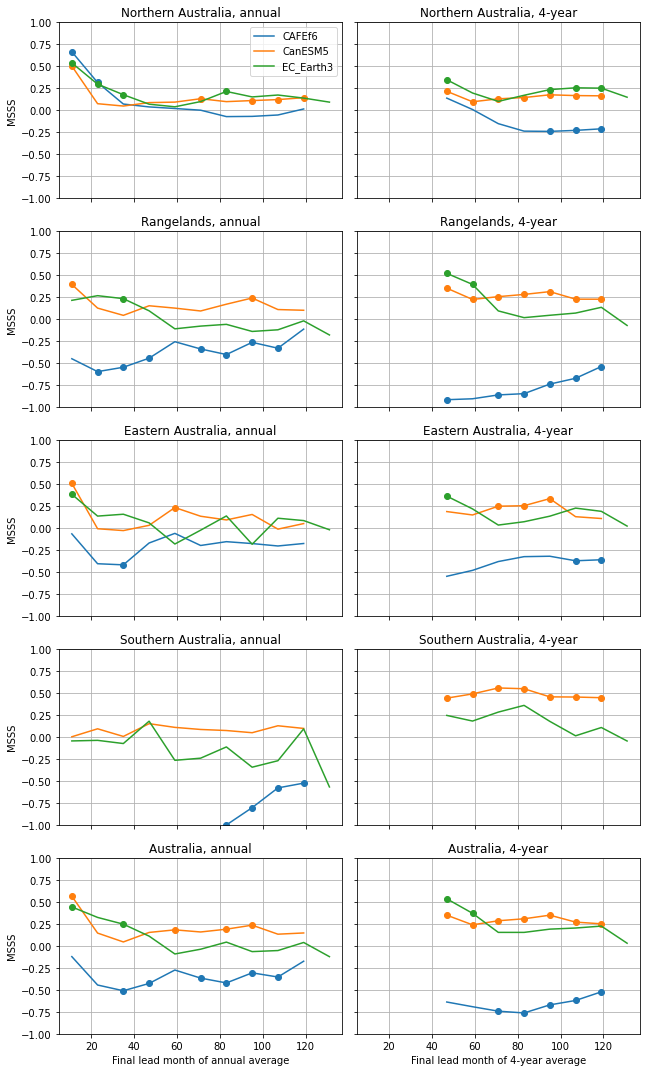

In [7]:
_ = plot_skill(
    ["CAFEf6", "CanESM5", "EC_Earth3"],
    "JRA55",
    ["annual", "4-year"],
    "t_ref",
    ["MSSS"],
)

### Rank probability skill score relative to historical simulations

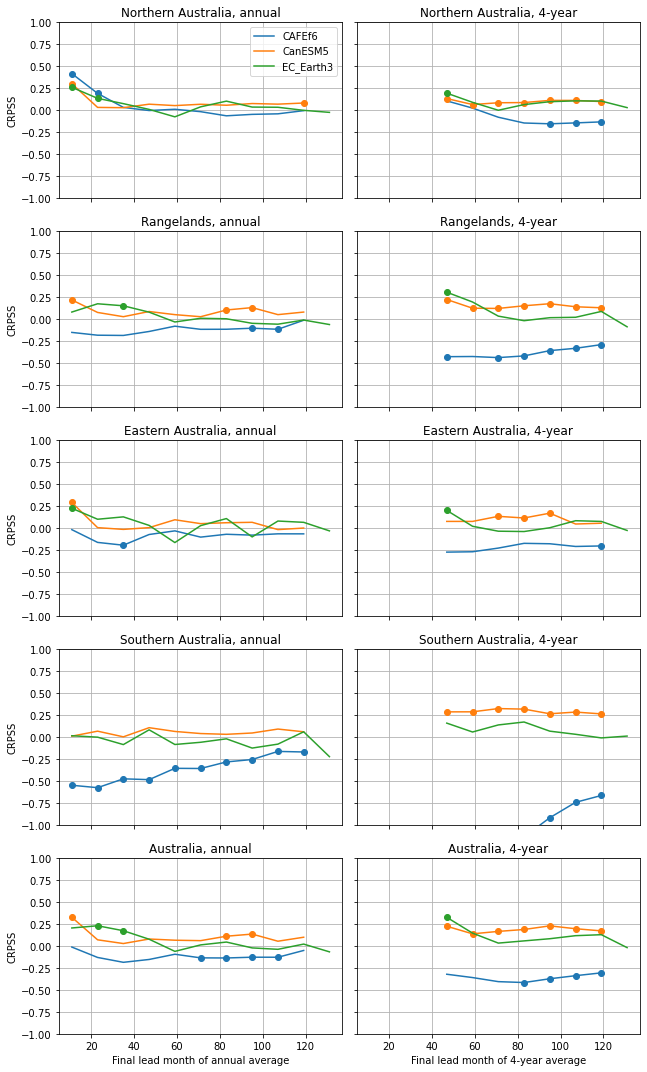

In [8]:
_ = plot_skill(
    ["CAFEf6", "CanESM5", "EC_Earth3"],
    "JRA55",
    ["annual", "4-year"],
    "t_ref",
    ["CRPSS"],
)

## Precipitation relative to AGCD

### Anomaly correlation coefficient

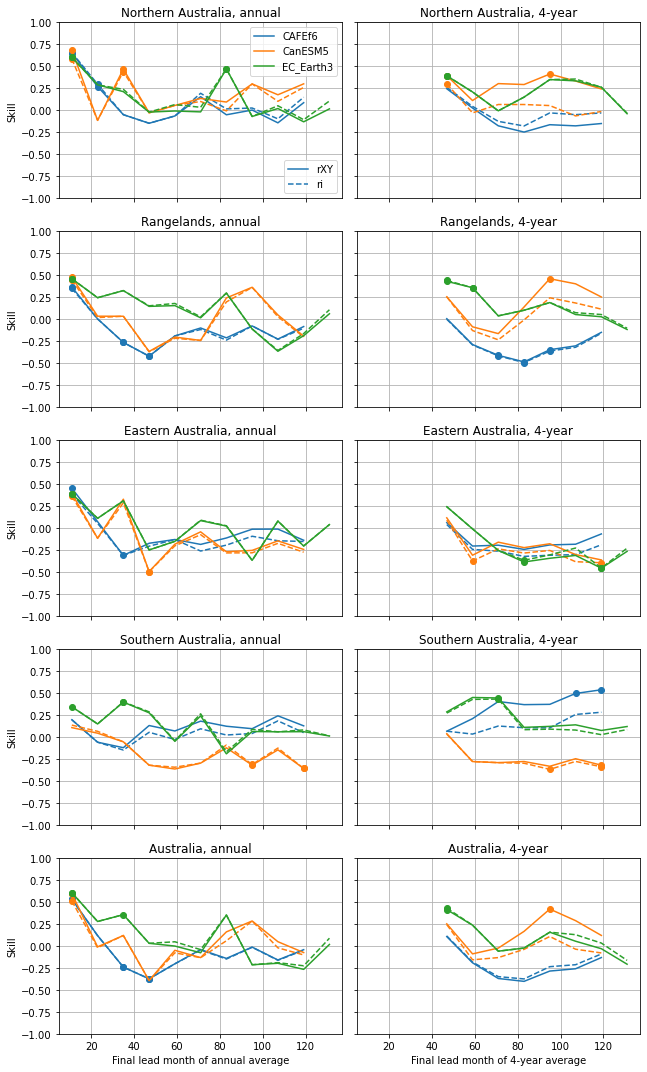

In [9]:
_ = plot_skill(
    ["CAFEf6", "CanESM5", "EC_Earth3"],
    "AGCD",
    ["annual", "4-year"],
    "precip",
    ["rXY", "ri"],
)

### Mean squared skill score relative to historical simulations

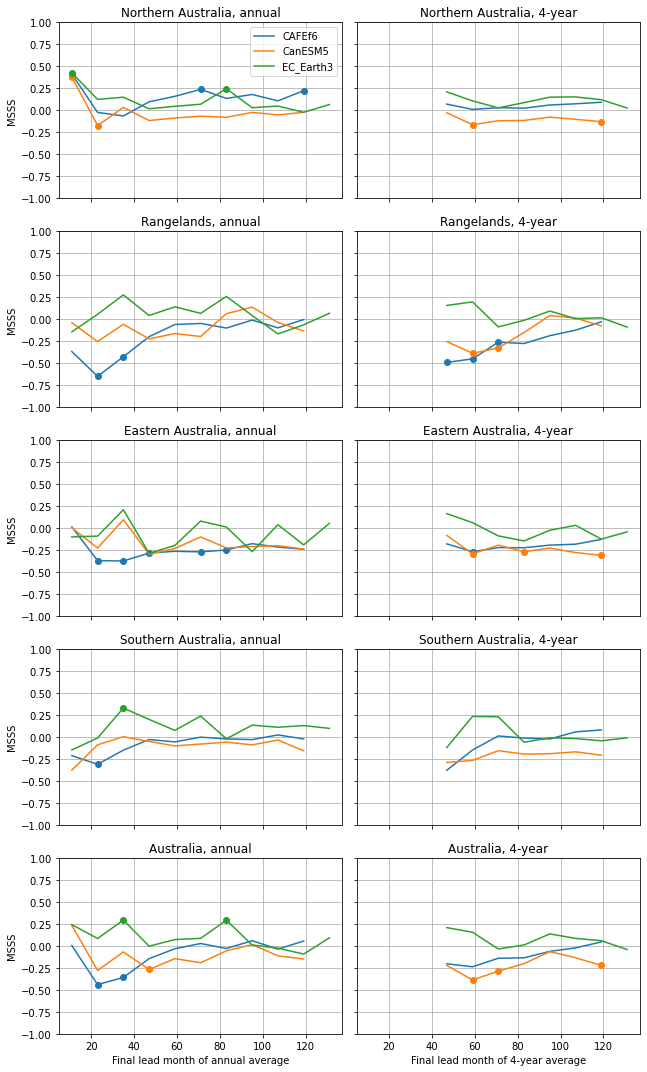

In [10]:
_ = plot_skill(
    ["CAFEf6", "CanESM5", "EC_Earth3"],
    "AGCD",
    ["annual", "4-year"],
    "precip",
    ["MSSS"],
)

### Rank probability skill score relative to historical simulations

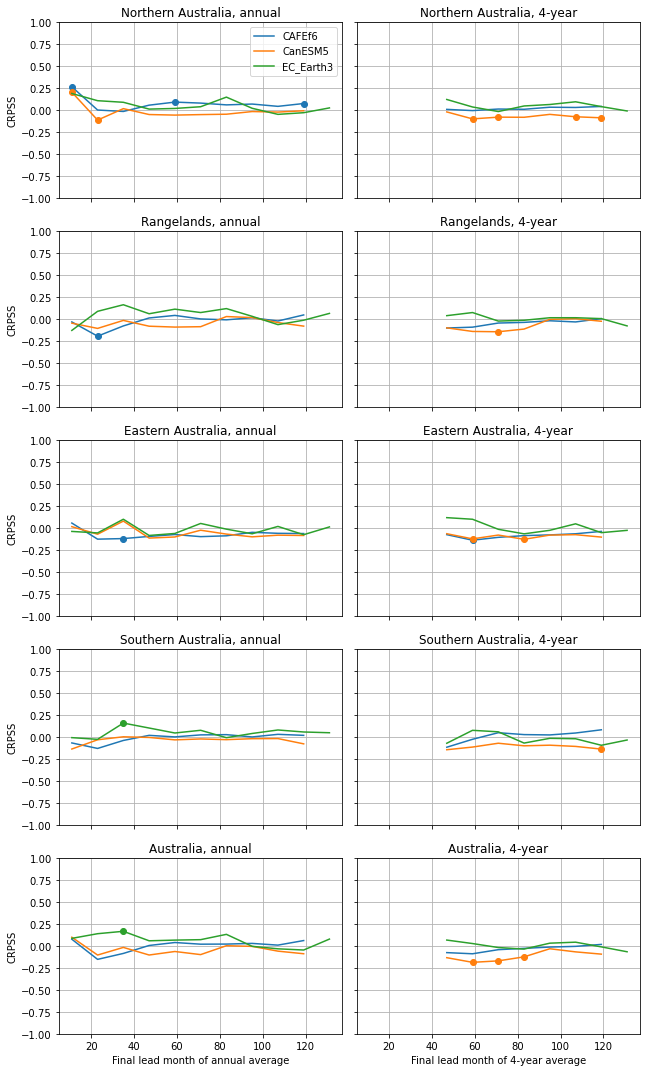

In [11]:
_ = plot_skill(
    ["CAFEf6", "CanESM5", "EC_Earth3"],
    "AGCD",
    ["annual", "4-year"],
    "precip",
    ["CRPSS"],
)

## Near-surface (10m) wind relative to JRA55

### Anomaly correlation coefficient

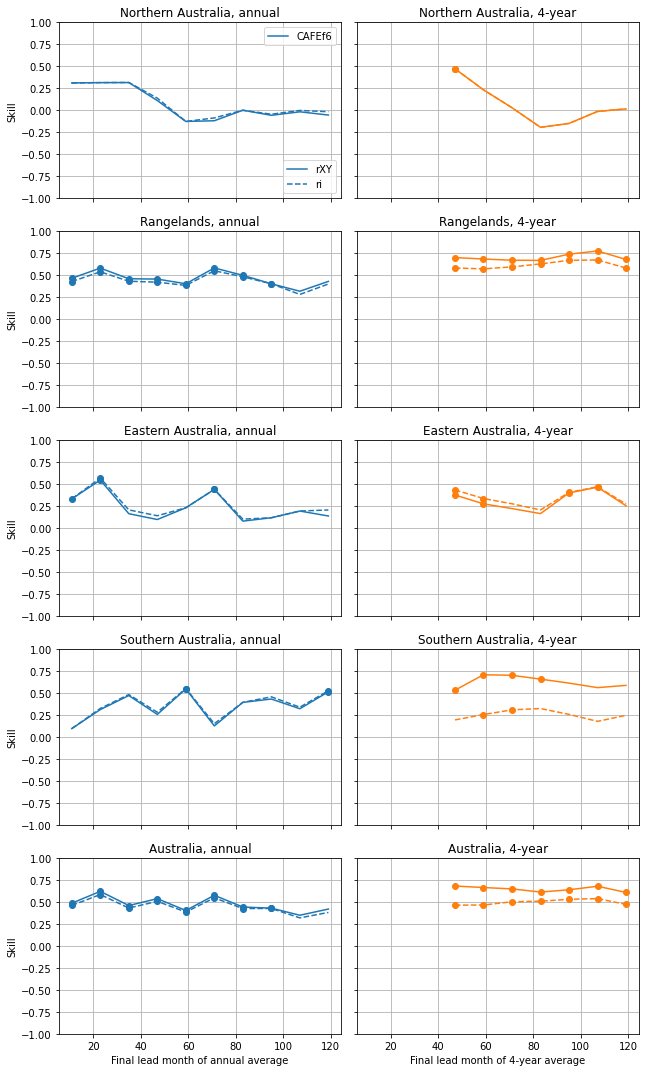

In [12]:
_ = plot_skill(
    ["CAFEf6"],
    "JRA55",
    ["annual", "4-year"],
    "V_tot",
    ["rXY", "ri"],
)

### Mean squared skill score relative to historical simulations

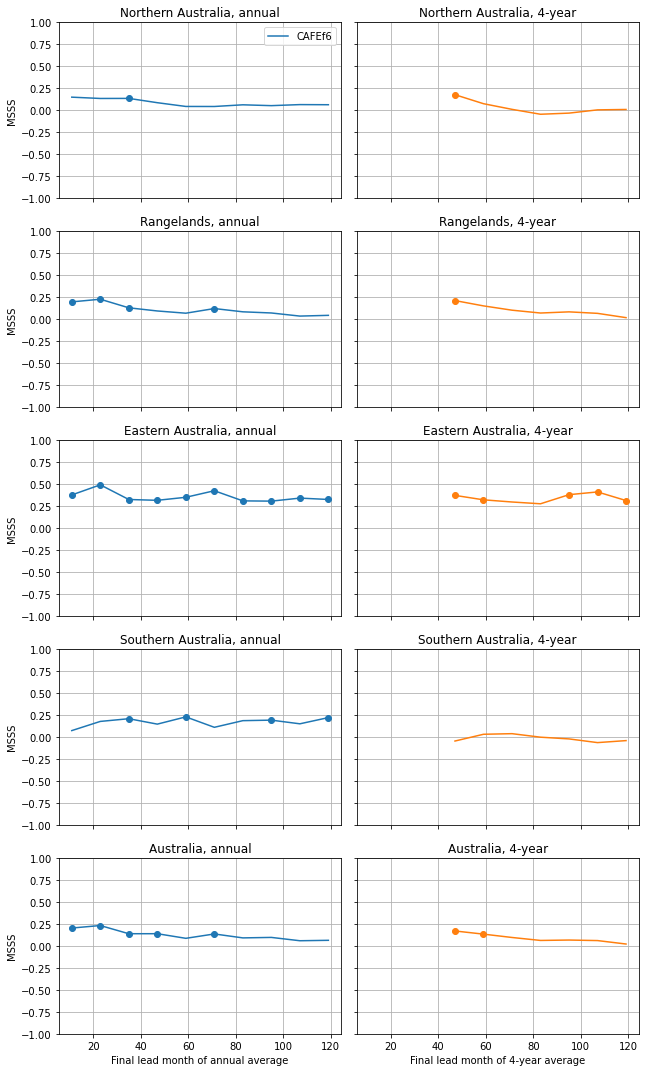

In [13]:
_ = plot_skill(
    ["CAFEf6"],
    "JRA55",
    ["annual", "4-year"],
    "V_tot",
    ["MSSS"],
)

### Rank probability skill score relative to historical simulations

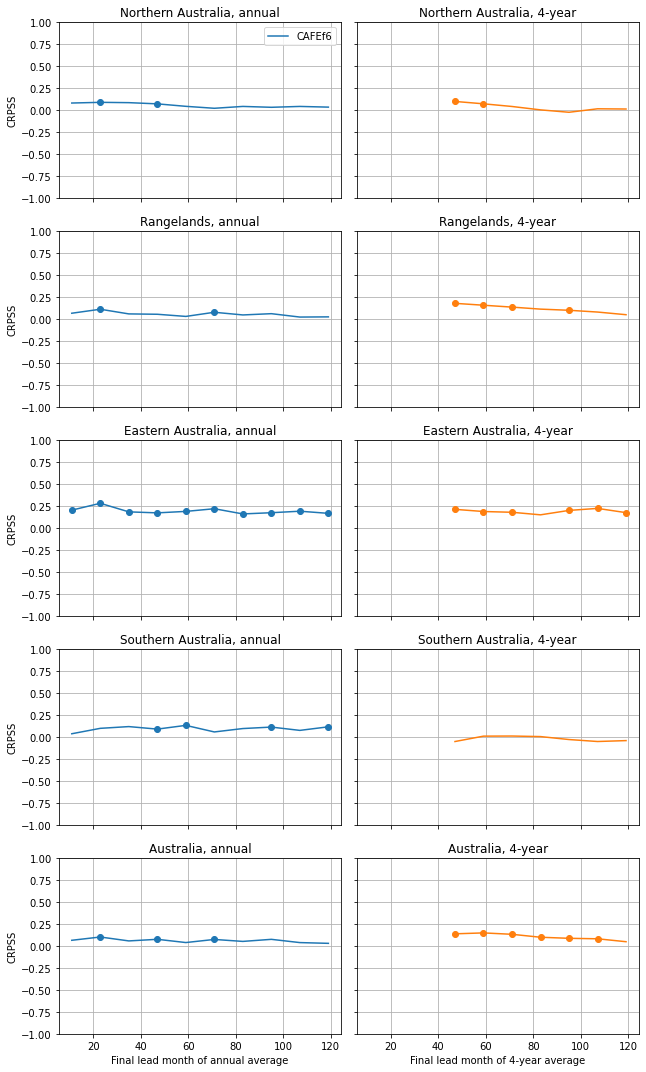

In [14]:
_ = plot_skill(
    ["CAFEf6"],
    "JRA55",
    ["annual", "4-year"],
    "V_tot",
    ["CRPSS"],
)